## The RSA Project: 
#### Assigned from CSPB 2824 - Discrete Structures

Name: Ginn Sato

Email: gisa9679@colorado.edu







<hr />

# Table of Contents

### 1. Introduction to the RSA Package and Project

### 2. RSA Code Package
###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Basic tool set
###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 First tool set
###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Second tool set

### 3. Putting Things Together

###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Encode
###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Decode

### 4. Demo of Encoding and Decoding a Message

### 5. Results of Code Exchange with Fellow Classmates

### 6. Reflection

### 7. Why FME?

### 8. How to Break Codes

### 9. Breaking Codes Examples

### 10. Comparison to Pollard Rho's Algorithm
















### 1. 
#### Introduction to the RSA Package and Project

In this project we dive into the world of cryptography through the powers and discoveries of number theory. The goal of this project is to share sensitive information with someone without the possibility of interception from an unwanted thrid party. To achieve this goal, we take advantage of the RSA Algorithm. The idea of RSA is that any party can share a public key in which another party can encrypt a message using this key. The message can only be decrypted by the first party, the one that shared the public key, since they also hold a private key that allows the message to be decrypted. The public key and private key are essentially complements of eachother, one being the lock, hiding the message away, and the other being the key that opens the message. This algorithm is based off simple concepts but finding the complement of the public key, is an extremely hard computation that can take 

This project drastically improved my understanding of cryptography and has helped me appreciate the seemingly simple number theory that lies behind the vast power of RSA. I wasn't really sure why the modulus operation existed besides finding a remainder, but now I realize how applicable it is in the modern day. On top of this, my understanding of factorization, algorithms analysis, and python were all improved. The following blocks of text and code are highly representative of my learning process and what skills I have gained.

### 2.1
#### Basic tool set

These are functions that I'll need to pre-process the messages before the messages are encoded and decoded by the RSA algorithm. That is the reason I'll be defining them first.



In [2]:
def Convert_Text(_string):
    integer_list = []                     # instantiate an empty lsit
    for ch in _string:                    # iterate through char in string
        integer_list.append(ord(ch))      # append ascii value of char into list
    
    return integer_list                   # return list

In [3]:
def Convert_Num(_list):
    _string = ''                           # instantiate empty string
    for i in _list:                        # iterate through ints in list
        _string += chr(i)                  # add the chr of ascii value onto string
    return _string                         # return string

In [4]:
def Convert_Binary_String(_int):
    bits = ''                               # instantiate empty bits
                                            # From here, use dec to bin algo
    while _int > 0:                         # while our num is greater 0 
        k = _int % 2                        # give us the remainder into k
        if k == 1:
            bits = (str(k)) + bits          # if k == 1, add a 1 to front
        else:        
            bits = '0' + bits               # if k != 1, add a 0 to front
        _int = _int // 2                    # integer divide _int
     
    return bits                             # return our string of bits

Now that I'm done with the basic toolset I'll move on to the first tool set which is actually involved in the RSA system.

### 2.2 
#### First tool set.



In [5]:
def FME(b, n, m):           # pass in values of form (b^n % m)
    x = 1                   # x is result
    sq = b                  # sq is essentially our base 
    while n > 0:            # loop converts n to bin & iter. through our bin #
        k = n % 2           # k is remainder   
        n = n // 2          # int divide n
        if k == 1:          # check if bit is relevant
            x = (x*sq) % m  # bit is 1, so take mod of value times x
        sq = (sq*sq) % m    # square our number mod b (goes up to next square power)
    return x                # return result after complete iter.

In [6]:
def Euclidean_Alg(a, b):
    while b > 0:            # while loop to perform operation
        k = a % b           # set k equal to the remainder of the two
        a = b               # a takes on b's old value
        b = k               # b takes on value of remainder, then repeat
    return a                # a becomes gcd

### 2.3
#### Second tool set

Here we will implement the meat of the RSA cryptosystem. The functions below will generate the public and private key pairs which will then be used to create a ciphertext using the public key and then decode the same using the pirvate key.



In [7]:
def Find_Public_Key_e(p, q):
    n = p*q                                                  # defines the value n
    r = (p-1)*(q-1)                                          # defines the value r (used to take advantage of fermat's little thm)
    e = 10                                                   # starting value of e (could be anything)
    while Euclidean_Alg(r,e) != 1 or e == p or e== q:        # continue loop if they are not rel prime or if e equals p or q
        e += 1                                               # if so, iterate e
    return n, e                 

In [8]:
def Find_Private_Key_d(e, p, q):
    m = e                                       # set m
    n = (p-1)*(q-1)                             # set n
    (s1, t1) = (1, 0)                           # initializing coefficients
    (s2, t2) = (0, 1)

    while n > 0:                                # we continue this while n > 0
        k = m % n                               # get modulus (remainder)
        r = m // n                              # this gets integer division
        m = n                                   # m takes on value of integer divison
        n = k                                   # n takes on the remainder 
        (s1_hat, t1_hat) = (s2, t2)             # use hat values as temp
        (s2_hat, t2_hat) = (s1-r*s2, t1-r*t2)   
        (s1, t1) = (s1_hat, t1_hat)             # set the original values to the saved hat
        (s2, t2) = (s2_hat, t2_hat)

    while s1 < 0:                               # since we always want s1 to be positive (s1 becomes d)
        s1 = s1 + ((p-1)*(q-1))                 # we can reverse the signs of the bezout coeff
        t1 = t1 - e                             # using these equations 
    
    return s1                                   # return our gcd along with the bezout coefficients=

### 3.
#### Putting Things Together.

1. In this part, I will define two functions `Encode` and `Decode` which will use the public and private keys that I calculated using the above 2 functions in the second toolset.
2. Using the public key, the `Encode` function will encode a message and generate the corresponding cipher_text.
3. Using the private key, the `Decode` function will decode a ciper_text and recover the original message.



In [9]:
def Encode(n, e, message):
    num_list = Convert_Text(message)           # generate list of nums from Convert_text fnc
    
    cipher_text = []                           # instantiate empty list
    
    for num in num_list:                       # iterate through list of nums
        cipher_text.append(FME(num, e, n))     # for each number use the fomula M^e mod n = C
    return cipher_text                         # after appending each encrytpted letter, return list

In [10]:
def Decode(n, d, cipher_text):
    num_list = []                                      # instantiate empty list of nums
    
    for num in cipher_text:                            # iterate through the ciphered text
        num_list.append(FME(num, d, n))                # use C^d mod n to get M, append this to list
     
    return Convert_Num(num_list)                       # convert these nums to string and return

### 4.  Demo of Encoding and Decoding a Message




### Let's Encode a Message
First I will generate the public key using two prime numbers that have a product greater than 256 (The highest integer ascii value).
I will call the Find_Public_Key_e and Find_Private_Key_d functions that take advantage of the gcd and Extended Euclidean Algorithm to generate the keys and the n. 

In [11]:
p = 199                                           # define our prime numbers here
q = 283

n,e = Find_Public_Key_e(p,q)                      # calculate a viable public key e 

d = Find_Private_Key_d(e,p,q)                     # calculate private key d

Next I will encode some message using these keys by first converting the message to a list of integers. I then encode the list using our Public Key. You can see the different outputs before encoding and after encoding. 

In [12]:
message = "Who's your favorite musician?"              # Message
message_int = Convert_Text(message)                    # Convert Message to integer representation 

message_encoded = Encode(n,e,message)                  # Encode our message using encode function

print("Before Encoding: {}".format(message_int))       # Print both for comparison
print("After  Encoding: {}".format(message_encoded))   


Before Encoding: [87, 104, 111, 39, 115, 32, 121, 111, 117, 114, 32, 102, 97, 118, 111, 114, 105, 116, 101, 32, 109, 117, 115, 105, 99, 105, 97, 110, 63]
After  Encoding: [37509, 39126, 54753, 39887, 11422, 31893, 30362, 54753, 55637, 34289, 31893, 3115, 21362, 38878, 54753, 34289, 48088, 16092, 589, 31893, 32293, 55637, 11422, 48088, 54532, 48088, 21362, 37760, 53321]


Finally I will decode our encoded message by using the variable d which holds our private key that we calculated earlier. The output is shown below the following code cell. 

In [14]:
message_decoded = Decode(n,d,message_encoded)
print(message_decoded)

Who's your favorite musician?


### Let's go to Piazza, a platform for our class related discussions, and find a message to decode.
Here is the post I found, posted by Professor Stade. We are going to copy the values into our code and perform the decode operations that we reviewed above.

Public key n,e = (5251,3)

Private key n,d = (5251, 3403)

Encoded Message = [2128, 1150, 4250, 1349, 1262, 3336, 2371, 2497, 519, 1262, 1263, 1105, 3336, 1349, 1262, 2310, 1105, 3336, 4115, 762, 2405, 1263, 1105, 3336, 1262, 1349, 1150, 1105, 1262, 506, 1105, 1105, 4723, 2405, 2497, 519, 1262, 1974, 2371, 58, 1262, 519, 1105, 1349, 1262, 4839, 1150, 1105, 2497, 1262, 1974, 2371, 58, 762, 1262, 13, 4679, 1573, 1262, 4115, 2371, 2310, 1105, 1262, 2405, 3336, 1262, 4839, 2371, 762, 1560, 2405, 2497, 519, 3250]

In [15]:
n, d = (5251, 3403)
e = 3
encoded_message = [2128, 1150, 4250, 1349, 1262, 3336, 2371, 2497, 519, 1262, 1263, 1105, 3336, 1349, 1262, 2310, 1105, 3336, 4115, 762, 2405, 1263, 1105, 3336, 1262, 1349, 1150, 1105, 1262, 506, 1105, 1105, 4723, 2405, 2497, 519, 1262, 1974, 2371, 58, 1262, 519, 1105, 1349, 1262, 4839, 1150, 1105, 2497, 1262, 1974, 2371, 58, 762, 1262, 13, 4679, 1573, 1262, 4115, 2371, 2310, 1105, 1262, 2405, 3336, 1262, 4839, 2371, 762, 1560, 2405, 2497, 519, 3250]

print(Decode(n,d,encoded_message))            # print decoded message ("What song best describes the feeling you get when your RSA code is working?")

message = "The Adults Are Talking"            # My Response
print(Encode(n,e,message))                    # Print encoded message for reply

What song best describes the feeling you get when your RSA code is working?
[4592, 1150, 1105, 1262, 1573, 2310, 58, 4723, 1349, 3336, 1262, 1573, 762, 1105, 1262, 4592, 4250, 4723, 1560, 2405, 2497, 519]


### 5.
#### Results of Code Exchange with Fellow Classmates
Here are three different examples of exchanging code with classmates.

#### First Example
##### Posted by Elizabeth Walker:

Public key n, e = (12202527773,7 )

Private key n, d = (12202527773,1743186583)

Encoded Message = [6940160750, 1118419552, 5348093080, 11430223976, 11287651021, 9954682822, 7169287481, 2207760049, 3041030038, 1844615566, 9954682822, 6172837679, 5348093080, 402542667, 2207760049, 1844615566, 2694515162, 11430223976, 2126197123, 9954682822, 2207760049, 3041030038, 11430223976, 284900265, 2207760049, 2207760049, 1844615566, 9954682822, 5348093080, 3627660525, 11430223976, 2694515162, 402542667, 2694515162, 11430223976, 7169287481]

In [14]:
e = 7
n,d = (12202527773,1743186583)
enc = [6940160750, 1118419552, 5348093080, 11430223976, 11287651021, 9954682822, 7169287481, 2207760049, 3041030038, 1844615566, 9954682822, 6172837679, 5348093080, 402542667, 2207760049, 1844615566, 2694515162, 11430223976, 2126197123, 9954682822, 2207760049, 3041030038, 11430223976, 284900265, 2207760049, 2207760049, 1844615566, 9954682822, 5348093080, 3627660525, 11430223976, 2694515162, 402542667, 2694515162, 11430223976, 7169287481]
print(Decode(n,d,enc))                       # Whats your favorite outdoor activity

response = "Playing soccer with friends"     # Response
print(Encode(n,e,response))                  # Print Encoded Response

whats your favorite outdoor activity
[7577285986, 10126833940, 5348093080, 7169287481, 2694515162, 9543992963, 10311646193, 9954682822, 11287651021, 2207760049, 3627660525, 3627660525, 2126197123, 1844615566, 9954682822, 6940160750, 2694515162, 11430223976, 1118419552, 9954682822, 6172837679, 1844615566, 2694515162, 2126197123, 9543992963, 284900265, 11287651021]


#### Second Example
##### Posted by Michael Becker

Public key n, e = (95839, 47)

Private key n, d = (95839, 30383)                       

Encoded Message = [77729, 91101, 35790, 61009, 11263, 72699, 21592, 11263, 67164, 6505, 2134, 16072, 11263, 33897, 35790, 63091, 6505, 16072, 72699, 61009, 8849, 11263, 21592, 36081, 6505, 16072, 61009, 21592, 11263, 61009, 8849, 35790, 78155, 12286]

In [15]:
e = 47
n,d = (95839, 30383)
enc = [77729, 91101, 35790, 61009, 11263, 72699, 21592, 11263, 67164, 6505, 2134, 16072, 11263, 33897, 35790, 63091, 6505, 16072, 72699, 61009, 8849, 11263, 21592, 36081, 6505, 16072, 61009, 21592, 11263, 61009, 8849, 35790, 78155, 12286]

print(Decode(n,d,enc))                       # What is your favorite sports team?

response = "Chelsea Blues"                   # Response
print(Encode(n,e,response))                  # Print Encoded Response

What is your favorite sports team?
[33989, 91101, 8849, 71626, 21592, 8849, 35790, 11263, 29447, 71626, 2134, 8849, 21592]


#### Third Example
##### Posted by Riley E Lamers

Public Key n,e = (1409645458688011, 5)

Private Key n,d =(1409645458688011, 563858137879517)

Encoded Message = [1934917632, 16850581551, 23863536599, 33554432, 10000000000, 16850581551, 33554432, 25937424601, 16850581551, 21924480357, 33554432, 14693280768, 12762815625, 14025517307, 10510100501, 33554432, 25937424601, 16850581551, 21924480357, 19254145824, 33554432, 9509900499, 16850581551, 11040808032, 11040808032, 10510100501, 10510100501, 992436543]

In [16]:
e = 5
n,d = (1409645458688011, 563858137879517)
enc = [1934917632, 16850581551, 23863536599, 33554432, 10000000000, 16850581551, 33554432, 25937424601, 16850581551, 21924480357, 33554432, 14693280768, 12762815625, 14025517307, 10510100501, 33554432, 25937424601, 16850581551, 21924480357, 19254145824, 33554432, 9509900499, 16850581551, 11040808032, 11040808032, 10510100501, 10510100501, 992436543]
print(Decode(n,d,enc))                       # How do you like your coffee?

response = "Iced or non-existent"            # Response
print(Encode(n,e,response))                  # Print Encoded Response

How do you like your coffee?
[2073071593, 9509900499, 10510100501, 10000000000, 33554432, 16850581551, 19254145824, 33554432, 16105100000, 16850581551, 16105100000, 184528125, 10510100501, 24883200000, 12762815625, 20113571875, 21003416576, 10510100501, 16105100000, 21003416576]


### 6.
#### Reflection

The RSA Project was an extremely rewarding process to work through. It is so exciting that I can scroll through a whole page of Piazza posts and decode all of these seemingly meaningless messages into something worth discussing! Although it was somewhat of a complex process between learning the material and writing the functions that apply our knowledge, the results were quite satisfying. 

Throughout this project, I found that writing the functions immediately after learning the concept helped me to digest the material by applying it. This methodology also helped me debug the functions that were a bit more complex, since the material was so fresh in my mind. 

For me, the most challenging function was the Find_Public_Key_d() which takes advantage of the Extended Euclidean Algorithm. At first I thought my function was flawless, but was surprised by its simplicity. Thus, after a few tests I realized I had missed an edge case where our desired Bezout coefficients was negative. This could not be right because we know our Private Key, d, must be positive. I looked back to Piazza, which then led to me to the quiz that explained a loop could be used to overcome this scenario. After doing some math to figure out what exactly this loop should do, I realized it was just a simple while loop that added the value (p-1)*(q-1) to our key d (the desired bezout coef.). Besides this, there were a few other syntax issues that threw me off, but these were quickly overcome with a google search of how to, for example, add to the beginning of a list. 

Once I was confident with my functions and had performed a couple brief tests, it was time to ensure correct functionality by exchanging messages on Piazza. This was quite a rewarding process. As I had expected, I simply called my decode function with the appropriate parameters, printed it to the terminal, and bam, a complete english sentence transformed from a list of obscure numbers with no apparent meaning. After this I called the encode function with my response and printed out my list of ‘meaningless’ numbers. I found that writing all the variable definitions and function outputs into one code block was the easiest way to execute my code whilst replying to and reading from Piazza messages. Separating them into different code cells created confusion for me and would most likely confuse a reader as well. I used the same name to define all private keys so it made sense to have the public keys and its respective private key together. I will discuss more of this concept later on. 

Heading into this project I had no explicit plan, besides watching the lecture and starting early. This is what I did and it lead to a successful outcome. I don’t think anything else would have made much of a difference as I applied the material as soon as I learned it and didn’t get stuck on too much. Looking at the project ahead of time helped me grasp the size and expectations of the project which also allowed me to be comfortable with my level of planning. If it had been something much more intimidating and complex I would have created a more suitable plan. If I could describe my plan in a couple of words it would be “strategically winging it”. 

The lectures and other reasources on moodle were extremely helpful to my understanding and execution of this project. I definitely had to rewatch some sections of the lectures and having those at my disposal was key. I really only used outside sources for python syntax and finding big prime numbers. It’s crazy that there are whole websites just filled with prime numbers. Before this project I would have thought those websites were useless. The actual notebook description of the project was quite descriptive and I had little confusion about what I was supposed to do. 

My best mistake throughout this project was running my code cells out of order and creating a world of confusion for myself. I am typically used to running my code in a single .py file that executes from top to bottom. However, in the Jupyter Notebook, the place on the page is irrelevant to what code is ran first, it is dependent on which one the user executes first. I confused myself by reusing variable names and thinking that I had defines something previously but it was really being defined in a different spot. Once I realized this silly mistake I made sure to organize my code better and run my code in order, ensuring that variable definition cell blocks that I intended to use were executed beforehand. 





### 7.
#### Why FME?


FME or fast modular exponentation gets its name for a very obvious reason, it computes modular's of numbers with a large exponent extremely fast compared to a normal modular operation. The trick to FME takes advantage of a property of mods, namely (a*b) mod x = (a mod x)*(b mod x) mod x. Then, given a number to a very large power in which we need to modulate, which is exactly what the RSA algorithm uses to encode and decode messages, we are able to break it down into smaller more computable numbers. This trick greatly decreases the execution time and ensures that our code can run at an efficient pace, since after all, we are going to be performing these calculations a lot! If you don't believe me, take a look at the code below which computes the same high exponent modulation for an increasing exponent value using FME and without using FME. The timing in seconds of each operation is then outputed to the terminal. 

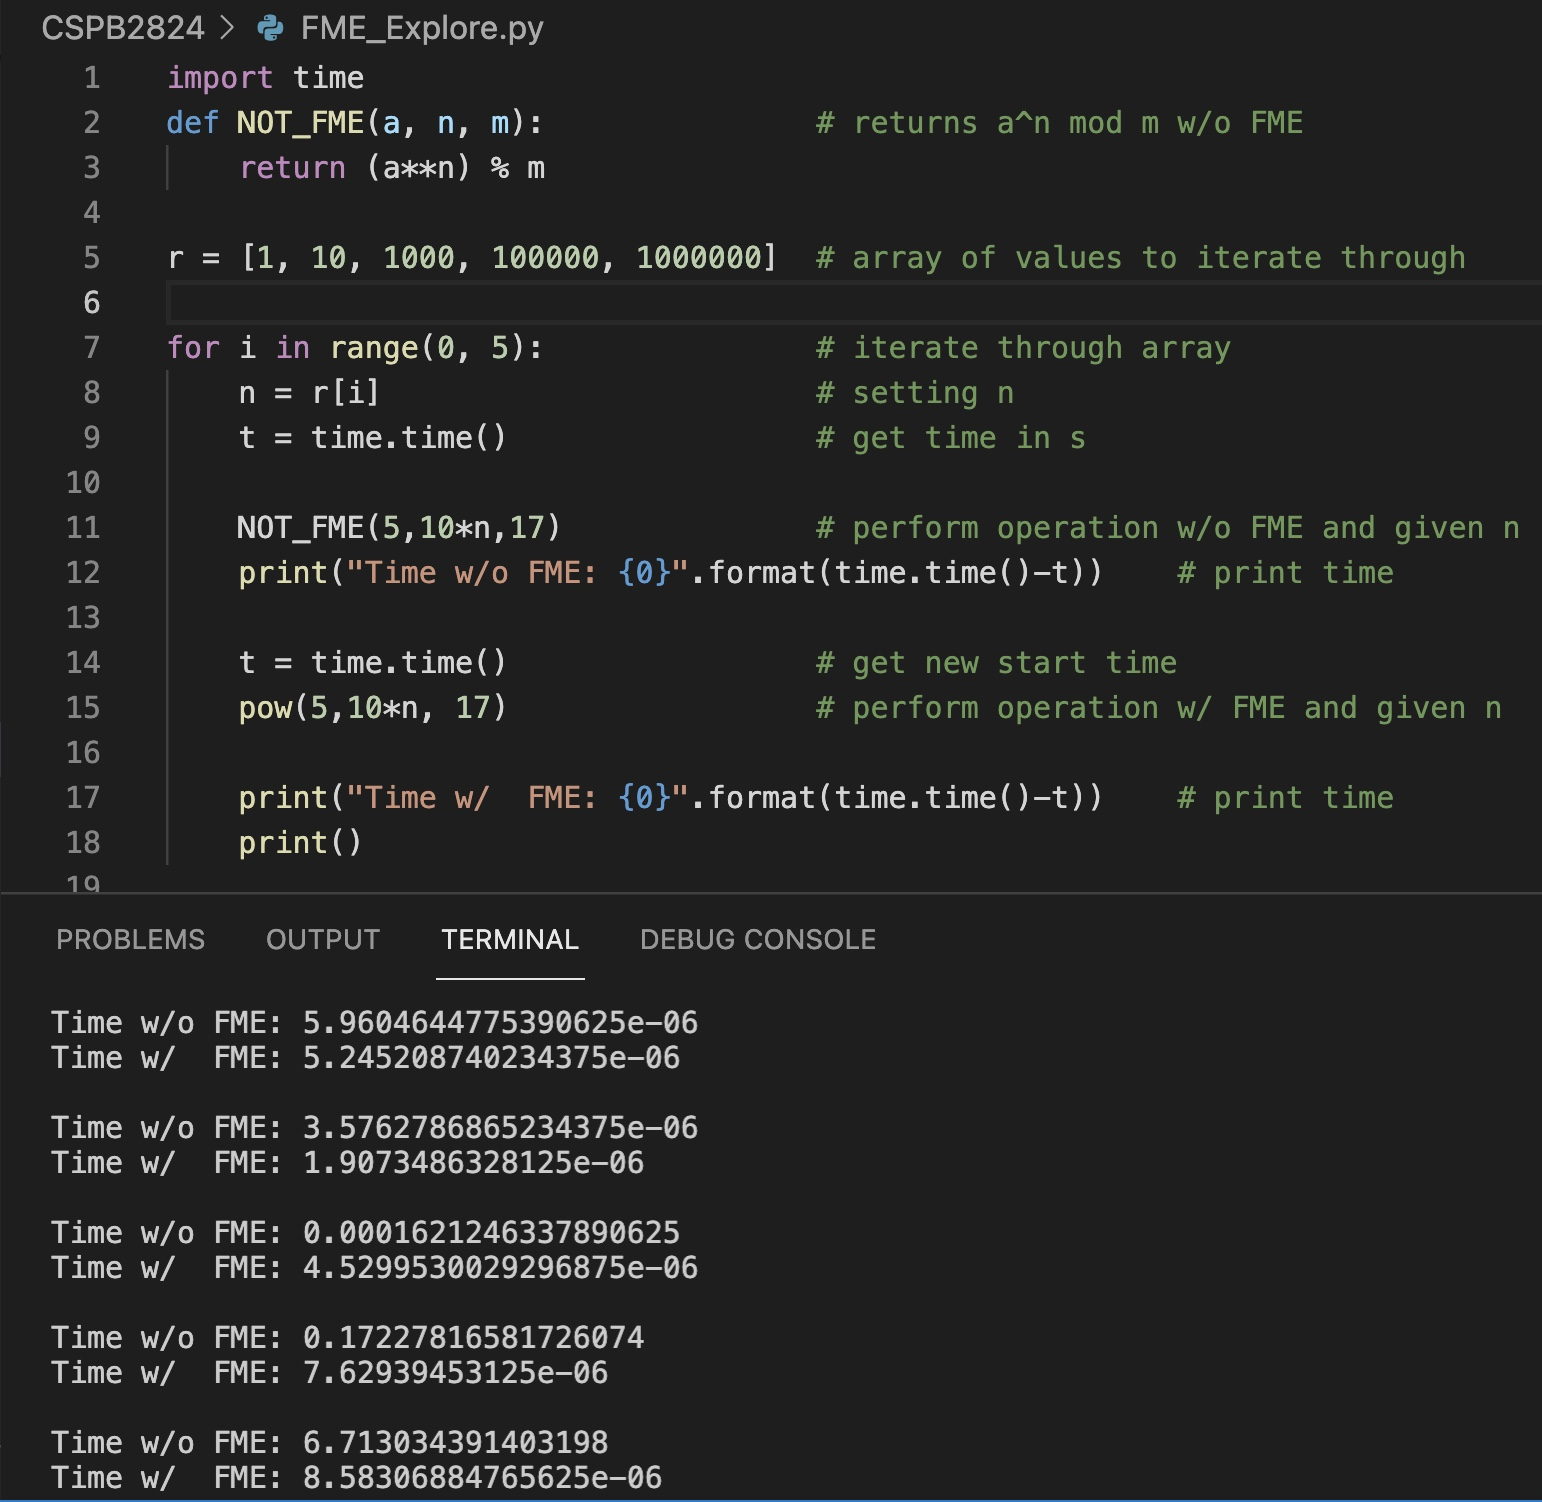



As you can see for a very large n, the computation got up to 6 seconds. In our RSA algorithm we take our number to the value of our key, either private or public, and modulate. For our examples we only use about 3 or 4 digit prime numbers that result in 6 or 7 digit key values. Our n value was about 8 digits when it took 6 seconds, so imagine it took 6 seconds to decode each number of a message. For extremely long messages this would take forever! On top of this, in real applications computers use around 200 digit numbers that result in 100s of digits for the key number. This would probably take years for a modern day computer to compute. This is why FME is essential for our RSA algorithm to be viable. 

## CODE BREAKING ##


**Brute Force Factorization Python Implementation**

In [16]:
def factorize(n):
    for i in range(2, n-1):                 # loops over all values besides 1 and n
        if n % i == 0:                      # checks if i divides n
            return i                        # if so, return i
        
    return False                            # n is prime (cannot be factored)


### 8. How to Break Code. 

The key to breaking code is figuring out the private key d. Once we have the private key we can decode the message and act accordingly. So we have to ask, what is required for the calculation of d? The steps to doing so are as follows:
* Notice our public keys of **e** and **n**
* Factor **n** into its two prime factors **p** and **q** using a factorzation function
* Call our Find_Private_Key_d function with the values found
* Use our Private Key **d** to decode the message

#### Security Analysis

From this explanation, breaking our RSA code may seem fairly easy to do and thus lead to the conclusion that RSA is not secure. This is true for very small values of p and q, however in real applications, these values tend to take on prime numbers of length around 200 digits. Using a brute force factorizaiton method would take forever on a number this large. It was found that using a multicore computer running in parallel it still took over 2 years to crack the factorization of a number this large. So until quantum computers are available to solve something like this, RSA is very secure and extremely difficult to break.

#### Flaws and Improvements

There are some improvements that may make our algorithm more secure. To begin with, the same symbol turns into the same encoded value after using our RSA algorithm, so given many context clues one could translate each number into its according symbol and decode the message without even needing a private key. This could be overcome by adding in another function that takes into account the place at which a symbol lies in the message (index position) and uses it to generate a unique number for each symbol in the message even if the symbols are the same. That way, when looking at an encoded message we cannot recognize two symbols being the same. 

### 9.
#### Breaking Codes Examples


#### Presenting the Encoded Message
Posted by Seth Ely:

Public key: [14809, 59]

Cipher: [9315, 6892, 7657, 6892, 6892, 14215, 10674, 12979, 3867, 7158, 1814, 3867, 13324, 6892, 13210, 7657, 12558, 10674, 13210, 14276, 12979, 3867, 2565]

**First I will define the given variables and the cipher**

In [18]:
n = 14809 

e = 59

cipher = [9315, 6892, 7657, 6892, 6892, 14215, 10674, 12979, 3867, 7158, 1814, 3867, 13324, 6892, 13210, 7657, 12558, 10674, 13210, 14276, 12979, 3867, 2565]


**Next, I call the factorize function on n which gives us one of the prime factors p. Since n = pq, we divide both sides by p to calculate our q.**

In [19]:
p = factorize(n)           # calculate smaller prime factor, p

q = n / p                  # divide n by p to find larger prime factor, q


**Now we have all the pieces we need to decode our cipher. First we have to call our Find_Private_Key_d function with the appropriate parameters to calculate d. Then we call the decode function and print the secret message which in this case holds the coordinates to our very own University of Colorado Boulder**

In [20]:
d = Find_Private_Key_d(e,p,q)       # find the private key d
print(Decode(n,d,cipher))

40.0076° N, 105.2659° W


#### **We can repeat this process and decode three more examples as follows**
#### #1
**Posted by Jael Johnson:**

Public Key(n,e) = (4387, 23)

Cipher = [1641, 2447, 3211, 3211, 2001, 4150, 1641, 849, 3211, 3211, 4121, 4150, 1641, 849, 2447, 4121, 1201, 849, 3211, 3211, 4121, 4150, 4268, 2001, 4150, 418, 1201, 849, 4150, 1641, 849, 2447, 4121, 1201, 4229, 4191, 849]

In [21]:
n,e = 4387,23

cipher = [1641, 2447, 3211, 3211, 2001, 4150, 1641, 849, 3211, 3211, 4121, 4150, 1641, 849, 2447, 4121, 1201, 849, 
         3211, 3211, 4121, 4150, 4268, 2001, 4150, 418, 1201, 849, 4150, 1641, 849, 2447, 4121, 1201, 4229, 4191, 849]
p = factorize(n)           # calculate smaller prime factor, p

q = n / p                  # divide n by p to find larger prime factor, q

d = Find_Private_Key_d(e,p,q)

print(Decode(n,d,cipher))

response = "The seashells she sells are seashore shells"

encoded_response = Encode(n,e,response)                        # Encode response

print("Encoded Response: {}".format(encoded_response))         # Print encoded message

Sally Sells Seashells By The Seashore
Encoded Response: [418, 1201, 849, 4150, 4121, 849, 2447, 4121, 1201, 849, 3211, 3211, 4121, 4150, 4121, 1201, 849, 4150, 4121, 849, 3211, 3211, 4121, 4150, 2447, 4191, 849, 4150, 4121, 849, 2447, 4121, 1201, 4229, 4191, 849, 4150, 4121, 1201, 849, 3211, 3211, 4121]


#### #2
**Posted by Matthew Tuttle:**

Public Key(n,e) = (7303, 17)

Cipher = [5907, 1907, 3946, 2643, 1907, 655, 3832, 1573, 6690, 6212, 6212, 6690, 4260, 7200, 3832, 4113, 3832, 655, 6690, 6690, 211, 3832, 7225, 1907, 6935, 4260, 3832, 1573, 3946, 4260, 1907, 655, 2351, 6690, 1573, 3946, 3832, 1650, 1907, 3946, 2643, 1907, 655, 1573, 7200, 3832, 523, 1907, 4260, 3832, 4113, 3832, 1713, 4360, 3832, 2351, 1907, 2643, 655, 2351, 3832, 2643, 655, 3946, 1907, 3832, 1066, 1713, 3946, 3946, 6212, 6690, 3832, 1713, 655, 211, 3832, 3946, 3915, 6690, 3832, 523, 1907, 6690, 1573, 3832, 4113, 3832, 523, 1713, 3765, 6690, 3832, 1713, 4260, 6690, 3832, 523, 6690, 1713, 4260, 1573, 1907, 4360, 6690, 2462]

In [22]:
n,e = 7303,17

cipher = [5907, 1907, 3946, 2643, 1907, 655, 3832, 1573, 6690, 6212, 6212, 6690, 4260, 7200, 3832, 4113, 3832, 655, 6690, 6690, 211, 3832, 7225, 1907, 6935, 4260, 3832, 1573, 3946, 4260, 1907, 655, 2351, 6690, 1573, 3946, 3832, 1650, 1907, 3946, 2643, 1907, 655, 1573, 7200, 3832, 523, 1907, 4260, 3832, 4113, 3832, 1713, 4360, 3832, 2351, 1907, 2643, 655, 2351, 3832, 2643, 655, 3946, 1907, 3832, 1066, 1713, 3946, 3946, 6212, 6690, 3832, 1713, 655, 211, 3832, 3946, 3915, 6690, 3832, 523, 1907, 6690, 1573, 3832, 4113, 3832, 523, 1713, 3765, 6690, 3832, 1713, 4260, 6690, 3832, 523, 6690, 1713, 4260, 1573, 1907, 4360, 6690, 2462]

p = factorize(n)           # calculate smaller prime factor, p

q = n / p                  # divide n by p to find larger prime factor, q

d = Find_Private_Key_d(e,p,q)

print(Decode(n,d,cipher))

response = "https://www.youtube.com/watch?v=P3cc9Ps_1BM"

encoded_response = Encode(n,e,response)                        # Encode response

print("Encoded Response: {}".format(encoded_response))         # Print encoded message

Potion seller, I need your strongest potions, for I am going into battle and the foes I face are fearsome.
Encoded Response: [3915, 3946, 3946, 1650, 1573, 4425, 3322, 3322, 2993, 2993, 2993, 2462, 7225, 1907, 6935, 3946, 6935, 1066, 6690, 2462, 3765, 1907, 4360, 3322, 2993, 1713, 3946, 3765, 3915, 6367, 5021, 510, 5907, 2006, 3765, 3765, 4233, 5907, 1573, 1319, 3209, 2545, 4343]


#### #3
**Posted by Elizabeth Walker:**

Public Key(n,e) = (59749, 3)

Cipher = [12187, 49382, 16438, 7422, 27150, 32768, 38840, 53153, 48139, 47568, 32768, 45475, 16438, 29809, 53153, 47568, 22394, 7422, 14568, 32768, 16522, 14568, 7422, 45475, 4983, 22394, 55028, 32768, 27150, 14568, 47568, 22394, 14568, 27150]

In [23]:
n,e = 59749,3

cipher = [12187, 49382, 16438, 7422, 27150, 32768, 38840, 53153, 48139, 47568, 32768, 45475, 16438, 29809, 53153, 47568, 22394, 7422, 14568, 32768, 16522, 14568, 7422, 45475, 4983, 22394, 55028, 32768, 27150, 14568, 47568, 22394, 14568, 27150]

p = factorize(n)           # calculate smaller prime factor, p

q = n / p                  # divide n by p to find larger prime factor, q

d = Find_Private_Key_d(e,p,q)

print(Decode(n,d,cipher))

response = "'Dark' or 'The OA' both are hidden gems"

encoded_response = Encode(n,e,response)                        # Encode response

print("Encoded Response: {}".format(encoded_response))         # Print encoded message

whats your favorite netflix series
Encoded Response: [59319, 15687, 16438, 47568, 30063, 59319, 32768, 53153, 47568, 32768, 59319, 54963, 49382, 14568, 32768, 15047, 35629, 59319, 32768, 44957, 53153, 7422, 49382, 32768, 16438, 47568, 14568, 32768, 49382, 22394, 44016, 44016, 14568, 16522, 32768, 17245, 14568, 40300, 27150]


### Analysis of Larger n's
Below we should the time it takes for our factor function to execute with different sizes of n and its prime factors. It takes about 10 times longer for each extra digit. This makes sense since our algorithm is O(n) running in linear time with respect to our input.

In [24]:
import time

t = time.time()
p = factorize(353246847673)
print("Time for n with 6 digit prime factors: {} seconds".format(time.time()-t))

t = time.time()
p = factorize(1830984091)
print("Time for n with 5 digit prime factors: {} seconds".format(time.time()-t))

t = time.time()
p = factorize(10614887)
print("Time for n with 4 digit prime factors: {} seconds".format(time.time()-t))


Time for n with 6 digit prime factors: 0.05524730682373047 seconds
Time for n with 5 digit prime factors: 0.005646944046020508 seconds
Time for n with 4 digit prime factors: 0.0003631114959716797 seconds


#### Encoding my own message for Piazza

In [25]:
p = 36943
q = 44111

n,e = Find_Public_Key_e(p,q)

print("Public Key(n,e) = ({},{})".format(n,e))

message = "Best Condiment and why?"

cipher = Encode(n,e,message)

print("Cipher = {}".format(cipher))

# Ensuring My message is decodable

p = factorize(n)           # calculate smaller prime factor, p

q = n / p                  # divide n by p to find larger prime factor, q

d = Find_Private_Key_d(e,p,q)

print("Decoded Message: {}".format(Decode(n,d,cipher)))



Public Key(n,e) = (1629592673,13)
Cipher = [336489089, 790495352, 1026156174, 792037268, 328094142, 905762081, 1209896438, 1113193909, 1144895309, 1277232906, 1259837692, 790495352, 1113193909, 792037268, 328094142, 1217356319, 1113193909, 1144895309, 328094142, 1034684646, 1294431967, 1420736799, 1084640708]
Decoded Message: Best Condiment and why?


### 10. 
#### Comparison to Pollard Rho's Algorithm





**Brute Force Factorization**

In [26]:
def Brute_Force(n):
    for i in range(2, n-1):                 # loops over all values besides 1 and n
        if n % i == 0:                      # checks if i divides n
            return i                        # if so, return i
        
    return False                            # n is prime (cannot be factored)

**Pollard's Rho Algorithm**

In [27]:
import random

def gcd(a,b):
    while b > 0:                 # while loop to perform operation
        k = a % b                # set k equal to the remainder of the two
        a = b                    # a takes on b's old value
        b = k                    # b takes on value of remainder, then repeat
    return a                     # a becomes gcd

def f(x,a,n): 
    return (x**2 + a) % n        # define f(x)

def Pollard_Rho(n):
    x = random.randint(2, n)     # get random number from [2,n]
    y = x
    a = random.randint(1, n-1)   # get random const from [1,n]
    d = 1                        # define d for loop check
    
    while d == 1:                # while loop not detected
        x = f(x,a,n)             # x moves 1
        y = f(f(y,a,n),a,n)      # y moves 2
        p = gcd(abs(x-y),n)      # p becomes gcd
        if p == n:               # if it is n, we call Pollar_Rho
            return Pollard_Rho(n)
        elif p > 1:              # not n, and greater than 1 so must be factor
            return p  
        if x == y:               # loop detected, return false
            d = 0
    
    return False

**Brute Force vs Pollard's Rho**

In this section we do an in depth analysis of two different prime factorization functions, the Brute Force Factorization and Pollard's Rho Algorithm. Pollard's Rho Algorithm takes advantage of probability and draws largely from the Birthday Paradox. Based off this we would expect Pollard's Rho Algorthm to be much faster, but lets ensure that this is the case and compare the two algorithm's execution time for different sized n's. 

Note: The execution of the following block should take less than a minute. 

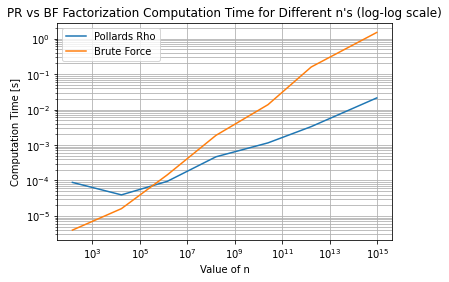

In [37]:
import time
import numpy as np
from matplotlib import pyplot as plt


n_list = [11*13, 127*131, 1187*1201, 12197*13121, 223007*111323, 1265347*1300021, 12211937*77777177]              # Defines list of n's

"""
Another list of n's with much larger values, execution time increases significantly (roughly 30 minutes).
n_list = [11*13, 127*131, 1187*1201, 12197*13121, 223007*111323, 1265347*1300021, 
            12211937*77777177, 120009779*138707461, 1500450271 * 5915587277]
"""

times_BF = []                                   # list of execution times for Brute Force
times_PR = []                                   # list of execution times for Pollard's Rho
average = 10.0                                  # Define averaging factor, larger the more accurate, but takes longer to execute code
for i in range(len(n_list)):                    # Iterate over list of n
    t_BF, t_PR = 0,0                            # set start times to zero
    for j in range(int(average)):               # compute times for designated average amount
        t1_PR = time.time()                     # get start time
        Pollard_Rho(n_list[i])                  # Compute with Pollard's Rho Alg
        t_PR += time.time()-t1_PR               # subtract start time from current to get alg exec. time (sum these)
        
        t1_BF = time.time()                     # repeat process for brute force
        Brute_Force(n_list[i])
        t_BF += time.time()-t1_BF 

    times_BF.append(t_BF/average)               # add averaged execution time to the list of times
    times_PR.append(t_PR/average)

# Defining plot features and labels using the Matplot library and a log-log scale

plt.plot(n_list,times_PR, label = 'Pollards Rho')                                       
plt.plot(n_list,times_BF, label = 'Brute Force')
plt.title("PR vs BF Factorization Computation Time for Different n's (log-log scale)")
plt.xlabel("Value of n")
plt.ylabel("Computation Time [s]")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.grid(True, which="both")
plt.show()

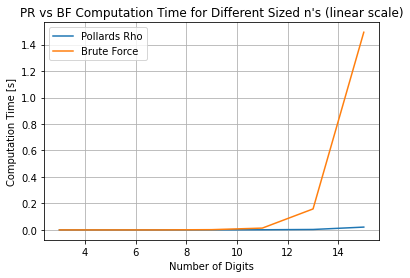

In [38]:
num_digits = []

for l in range(len(n_list)):
    num_digits.append(len(str(n_list[l])))

# Defining plot features and labels using the Matplot library and a linear scale

plt.plot(num_digits,times_PR, label = 'Pollards Rho')                                       
plt.plot(num_digits,times_BF, label = 'Brute Force')
plt.title("PR vs BF Computation Time for Different Sized n's (linear scale)")
plt.xlabel("Number of Digits")
plt.ylabel("Computation Time [s]")

plt.legend()
plt.grid(True, which="both")
plt.show()

#### Output 
when n_list = [11 * 13, 127 * 131, 1187 * 1201, 12197 * 13121, 223007 * 111323, 1265347 * 1300021, 12211937 * 77777177, 120009779 * 138707461, 1500450271 * 5915587277]

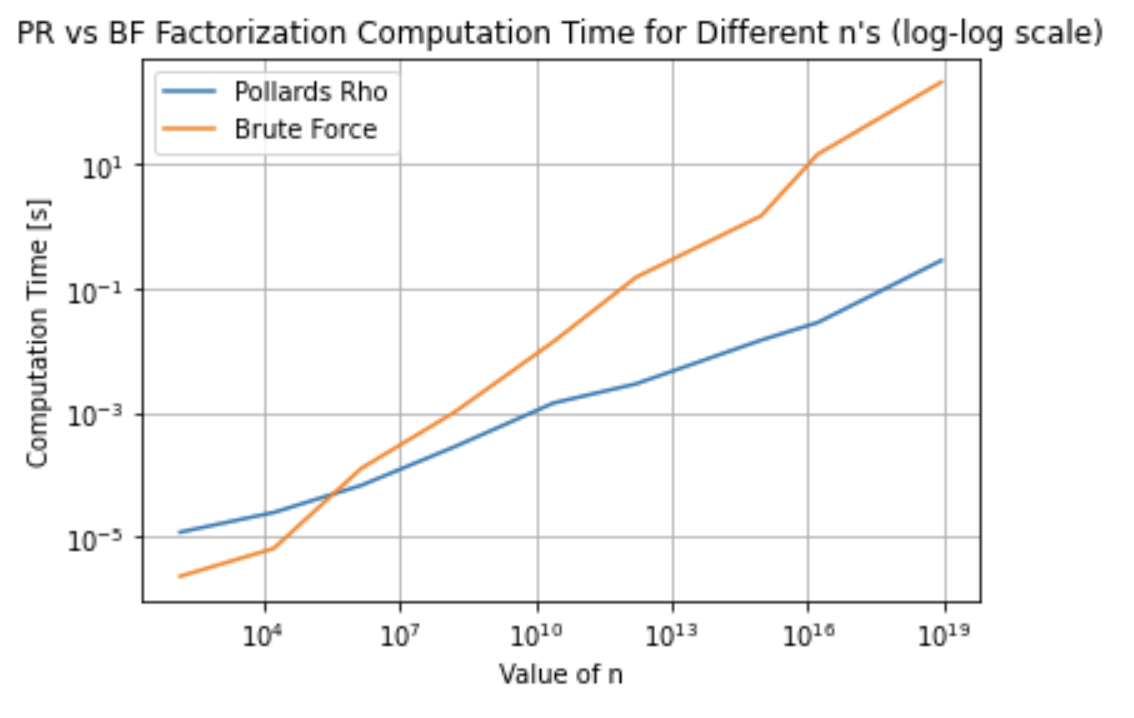

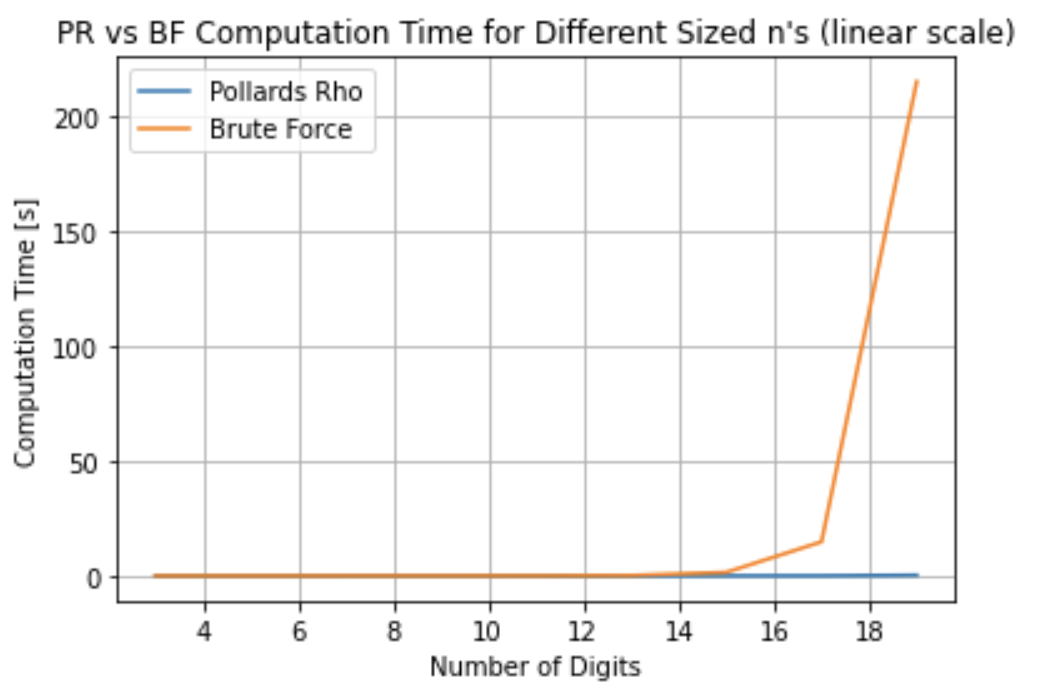

### Analysis
From both plots we can see that as n increases so does the execution time for both algorithms. This should be obvous to us and we want to take a further look into how the runtime for the Pollard's Rho Algorithm (PRA) compares to the Brute Force Algorthim (BFA). From the first plot we can see that for very small n values, around 3-5 digits, the BFA actually outperforms the PRA. This is likely due to the small range of numbers that BFA linearly iterates over which results in returning a value extremely fast, where the PRA essentially guesses over the entire range. The PRA outperforms the BFA for numbers 6 digits or higher and the difference between their performences tends to increase. From the first plot we can see that n's around 15 digits long have 100 times longer runtimes with the BFA compared to the PRA. From the first log-log plot it may not be extremely evident, but it becomes very evident in the second plot as there is an extreme growth in the execution time. If we were to go up to a 17 digit number, the execution time from experiments goes up to roughly 3 whole minutes or 180 seconds. For the purpose of this project, I leave that high of a number out of the executable code, but included prime numbers of length 10 digits in the plots directly above.

On the log-log scale we do see a fairly straight line which is expected, and we can confidently say that this trend will continue. Other algorithms like PRA have a touch of randomness added to them, which is why the trends are a bit more jagged. This is drastically reduced however with the averaging in our code. We can see a trend that the difference in execution times tends to grow bigger and bigger as n increases. 

From this analysis we can conclude that PRA is significantly more efficient when it comes to n's greater than 1 million. We could imagine that if looking at an n with roughly 200 digits, the execution time for both algorithms would be an extremely unreasonable amount of time, however our PRA would still achieve an answer in significantly less time.